<a href="https://colab.research.google.com/github/viczzzz/Capstone-Fashion-Trend-Forecasting/blob/main/Capstone_Kaggle_Milestone_4_and_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing  required libraries
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import random
sns.set_style("whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.getcwd()
os.chdir('/content/drive/MyDrive/zalando')

In [4]:
fashion_train_df = pd.read_csv('fashion-mnist_train.csv',sep=',')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv', sep = ',')

In [5]:
print('Train: ', fashion_train_df.shape)
print('Test: ', fashion_test_df.shape)

Train:  (60000, 785)
Test:  (10000, 785)


In [6]:
train = np.array(fashion_train_df, dtype = 'float32')
test = np.array(fashion_test_df, dtype='float32')

In [7]:
fashion_train_df.label.unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

In [8]:
#checking if there are any null values
fashion_train_df.isnull().any().sum()
fashion_test_df.isnull().any().sum()


0

In [9]:
class_names = {0 : 'T-shirt/top',
            1 : 'Trouser',
            2 : 'Pullover',
            3 : 'Dress',
            4 : 'Coat',
            5 : 'Sandal',
            6 : 'Shirt',
            7 : 'Sneaker',
            8 : 'Bag',
            9 : 'Ankle boot'}

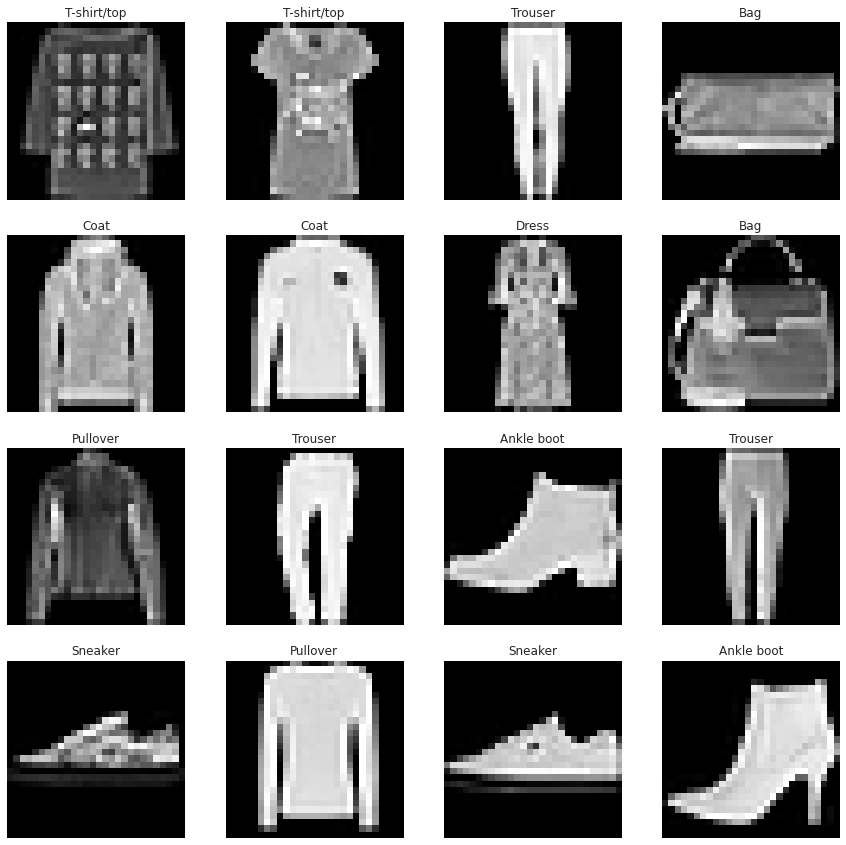

In [10]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = fashion_train_df.drop('label', axis=1).values[index].reshape(28,28)
        cloths = fashion_train_df['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(class_names[cloths])
        axe.set_axis_off()

In [11]:
#i = random.randint(1,60000)
# The values are mapped to colors using normalization and a colormap
#plt.imshow(train[i,1:].reshape((28,28))) 
#plt.imshow(train[i,1:].reshape((28,28)) , cmap = 'gray') 
#label_index = fashion_train_df["label"][i]
#plt.title(f"{class_names[label_index]}")
#plt.axis()

In [12]:
#Label of the random image
#label = train[i,0]
#label

In [13]:
fashion_train_df['label'].value_counts()

2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


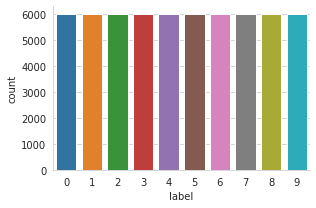

In [14]:
#All classes are equally Distributed.So, there is no need for OverSampling or UnderSampling.
sns.factorplot(x='label', data=fashion_train_df, kind='count', size=3, aspect= 1.5)

In [15]:
# Setting Random Seeds for Reproducibilty.
seed = 66
np.random.seed(seed)

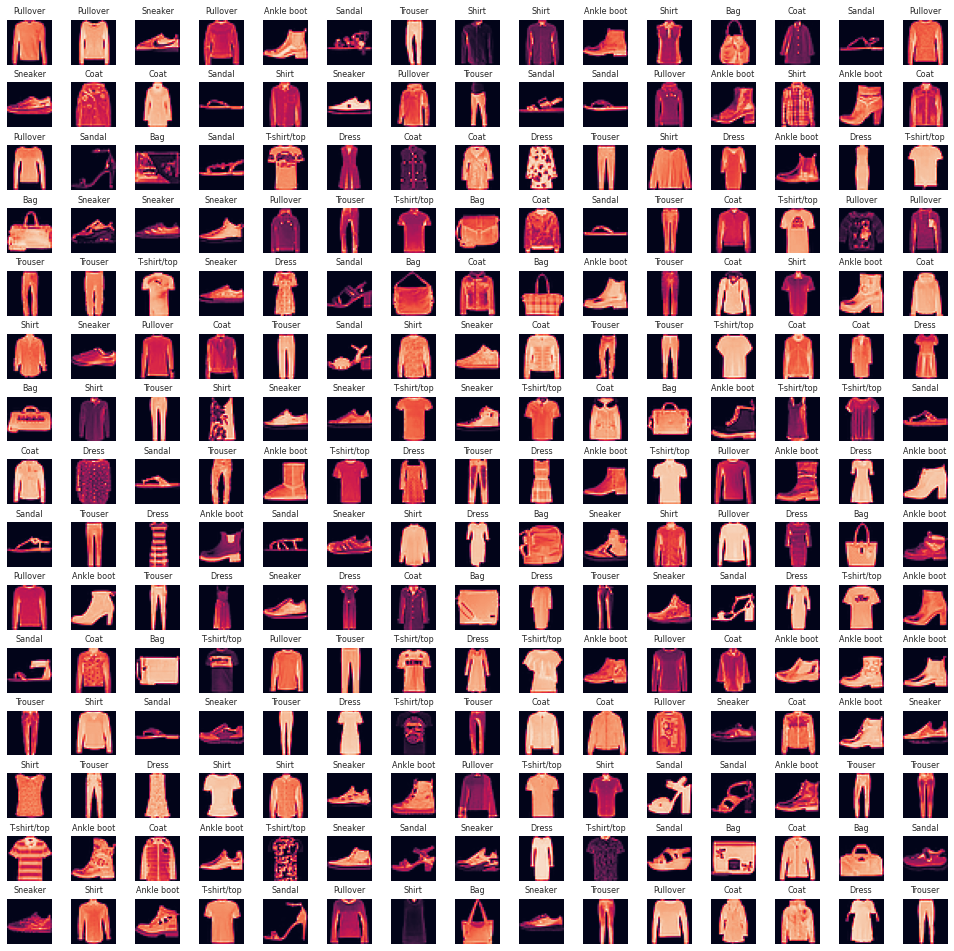

In [16]:
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train) # get the length of the train dataset
# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 
    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train[index,1:].reshape((28,28)) )
    label_index = int(train[index,0])
    axes[i].set_title(class_names[label_index], fontsize = 8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Prepare the training and testing dataset 
X = train[:, 1:] / 255
Y = train[:, 0]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=seed)

In [19]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

fashion_test_df.drop('label', axis=1, inplace=True)
df_test = fashion_test_df.values.reshape((-1, 28, 28, 1))

In [20]:
# You need to make sure that your Image is cast into double/float from int before you do this scaling 
# as you will most likely generate floating point numbers.
# And had it been int, the values will be truncated to zero.

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255
fashion_test_df = fashion_test_df.astype("float32")/255

In [21]:
!pip install keras.utils

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=352cd259f8d7b24d217155dfdb41ee3c318a8c08c55f651c62c074de9479a4e6
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [22]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [23]:
print(y_train.shape)
print(y_test.shape)

(54000, 10)
(6000, 10)


**Building a ConvNet**

1) At First, we use Sequential Keras API which is just a linear stack of layers. We add one layer at a time starting from input.

2) Next We add Convolutional Layers, which are the Building blocks of ConvNets. Convolutional Layers has set of Independent Filters whose depth is equal to Input and other dimensions can be set manually. These Filters when convolved over the Input Image produce Feature Maps.

It includes some HyperParameters such as The number of filters, Dimensions of Filter (F), Stride (S), Padding(P) , Activation Function etc. which we input manually. Let the Input Volume Size be deonted by (W) ,

Then, the Output will have Dimensions given by -->

(Height, Width) = ( ( W − F + 2P ) / S ) + 1

And the Depth will be equal to Number of Filters Specified.

3) Next We add Pooling Layers, which are used for Dimensionality Reduction or DownSampling the Input. These are used where we have lot of Input Features. It reduces the amount of Parameters and Computational power required drastically, thus reducing Overfitting. These along with Convolutional layers are able to learn more Complex features of the Image.

4) We add Batch Normalization where we acheive Zero mean and Variance one. It scales down outliers and forces the network to learn features in a distributed way, not relying too much on a Particular Weight and makes the model better Generalize the Images.

5) To avoid Overfitting We add Dropout. This randomly drops some percentage of neurons, and thus the weights gets Re-Aligned. The remaining Neurons learn more features and this reduces the dependency on any one Neuron. DropOut is a Regularization Technique, which Penalizes the Parameters. Generally we set the DropOutRate between 0.2-0.5 .

6) Finally we add Flatten layer to map the input to a 1D vector. We then add Fully connected Layers after some convolutional/pooling layers. It combines all the Features of the Previous Layers.

7) Lastly, we add the Output Layer. It has units equal to the number of classes to be identified. Here, we use 'sigmoid' function if it is Binary Classification otherwise 'softmax' activation function in case of Multi-Class Classification.

In [32]:
# Building a ConvNet
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout



model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

***4.2) Compiling the Model¶***

1) We need to compile the model. We have to specify the optimizer used by the model We have many choices like Adam, RMSprop etc.. Refer to Keras doc for a comprehensive list of the optimizers available.

2) Next we need to specify the loss function for the neural network which we want to minimize.

For Binary Classification we use "binary_crossentropy" and for Multi-class Classification we use "categorical_crossentropy".

3) Finally, We need to specify the metric to evaluate our models performance. Here I have used accuracy.

In [20]:


In [35]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [36]:
# Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [37]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_7 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 64)       

4.4) Learning Rate Decay


The Learning rate should be properly tuned , such that it is not too high to take very large steps, neither it should be too small , which would not alter the Weights and Biases.
We will use LearningRateScheduler here, which takes the step decay function as argument and return the updated learning rates for use in optimzer at every epoch stage. Basically it outputs a new learning rate at every epoch stage.

In [39]:
from keras.callbacks import LearningRateScheduler
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

4.5) Data Augmentation


In [41]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

In [42]:
datagen.fit(x_train)


4.6) Fitting the Model


In [44]:
batch_size = 128
epochs = 40

In [ ]:
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs, 
                              validation_data = (x_test, y_test), verbose=2, 
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr])

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


421/421 - 567s - loss: 0.7440 - accuracy: 0.7251 - val_loss: 2.7718 - val_accuracy: 0.2327 - lr: 0.0010 - 567s/epoch - 1s/step
Epoch 2/40
421/421 - 555s - loss: 0.5623 - accuracy: 0.7937 - val_loss: 0.3653 - val_accuracy: 0.8642 - lr: 9.0000e-04 - 555s/epoch - 1s/step
Epoch 3/40
421/421 - 549s - loss: 0.4895 - accuracy: 0.8223 - val_loss: 0.3482 - val_accuracy: 0.8720 - lr: 8.1000e-04 - 549s/epoch - 1s/step
Epoch 4/40
421/421 - 557s - loss: 0.4507 - accuracy: 0.8377 - val_loss: 0.3376 - val_accuracy: 0.8772 - lr: 7.2900e-04 - 557s/epoch - 1s/step
Epoch 5/40


5) Evaluating the Model¶

In [ ]:
score = model.evaluate(x_test, y_test)
print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

The Training and Validation Curves being close, we can conclude that the Model is not Overfitting the Data.


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, 
            classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

We can see that a large number of T-shirt are misclassified as Shirt.
Followed by, Shirts wrongly classified as Coat.


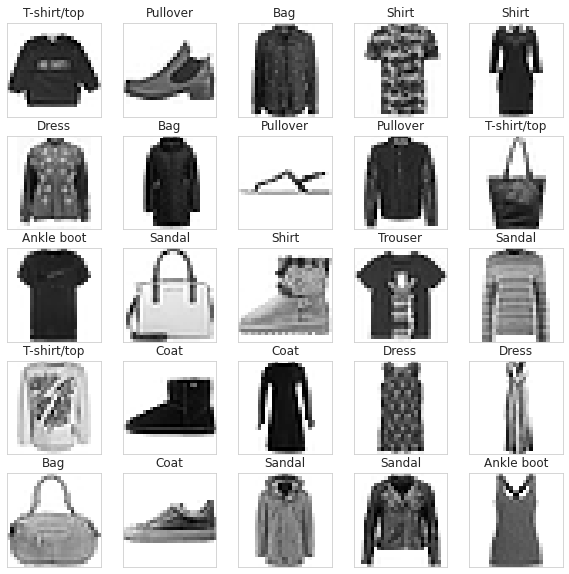

In [28]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape((28,28)), cmap=plt.cm.binary)
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

***ANOTHER WAY TO BUILD CNN & TRAIN THE MODEL***

In [13]:
#Split the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size = 0.2, random_state = 12345)

print(X_train.shape)
print(y_train.shape)

(48000, 784)
(48000,)


In [14]:
# Unpack the training and test tuple
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

print(X_train.shape)
print(y_train.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(48000,)
(12000, 28, 28, 1)


In [15]:
X_train.shape
Input_shape = X_train.shape[1:]
Input_shape

(28, 28, 1)

In [16]:
##To define and train the convolutional neural network, we will import the required libraries here.
#Library for CNN Model
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [17]:
#Defining the Convolutional Neural Network
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [18]:
#Compiling
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [19]:
#Training the CNN model
#history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))
history = cnn_model.fit(X_train, y_train, batch_size = 512, epochs = 5, verbose = 1, validation_data = (X_validate, y_validate))


Epoch 1/5
94/94 [==============================] - 45s 473ms/step - loss: 1.1575 - accuracy: 0.5609 - val_loss: 0.6741 - val_accuracy: 0.7467
Epoch 2/5
94/94 [==============================] - 47s 497ms/step - loss: 0.6910 - accuracy: 0.7411 - val_loss: 0.5746 - val_accuracy: 0.7856
Epoch 3/5
94/94 [==============================] - 45s 474ms/step - loss: 0.6107 - accuracy: 0.7719 - val_loss: 0.5191 - val_accuracy: 0.8106
Epoch 4/5
94/94 [==============================] - 45s 482ms/step - loss: 0.5560 - accuracy: 0.7937 - val_loss: 0.4852 - val_accuracy: 0.8198
Epoch 5/5
94/94 [==============================] - 45s 475ms/step - loss: 0.5217 - accuracy: 0.8079 - val_loss: 0.4443 - val_accuracy: 0.8394


Text(0.5, 1.0, 'Accuracy evolution')

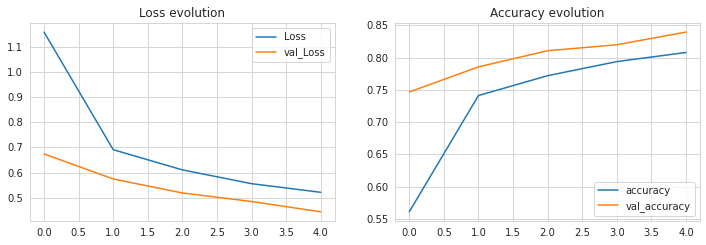

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='val_Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')

In [21]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 11ms/step - loss: 0.4358 - accuracy: 0.8397
Test Accuracy: 0.8396999835968018


In [22]:
#Predictions for the test data
predicted_classes = cnn_model.predict(X_test)
predicted_classes = np.round(predicted_classes).astype(int)
test_img = X_test
prediction = cnn_model.predict(test_img)
prediction[0]
np.argmax(prediction[0])

0

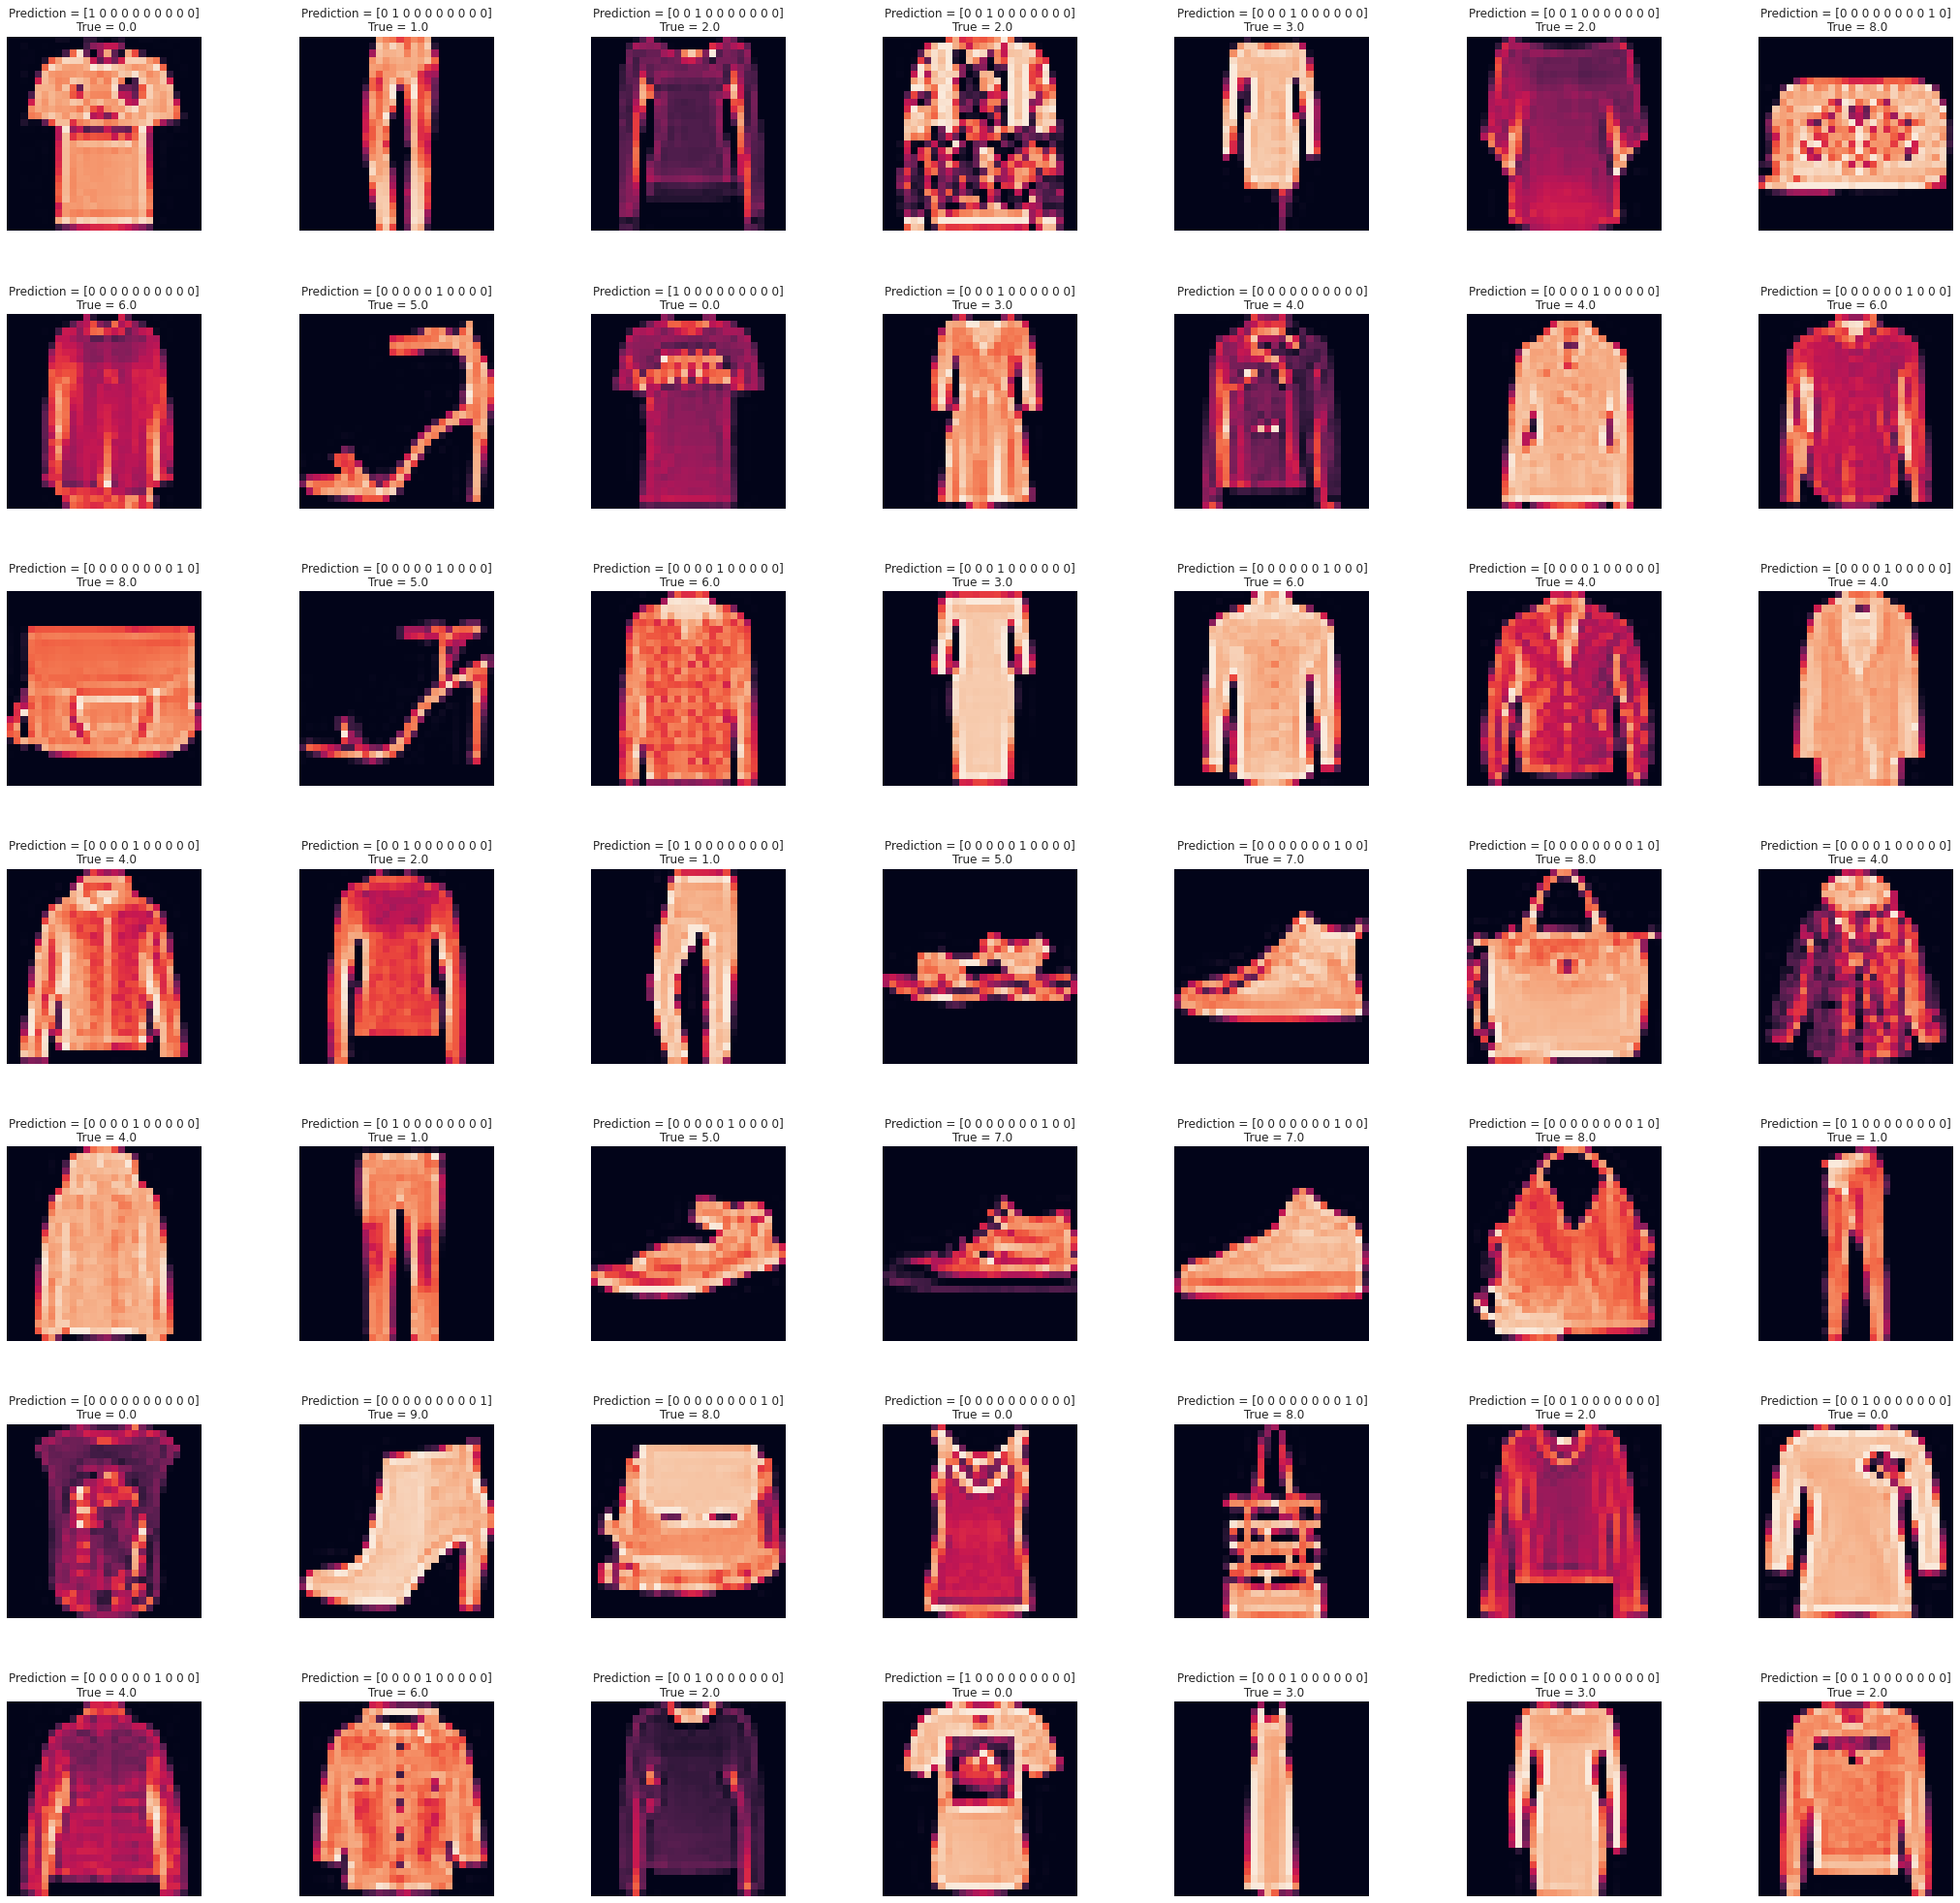

In [23]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (36,36))
axes = axes.ravel()
#X_test[i].tolist()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(28,28))
    #axes[i].set_title("Prediction Class = {predicted_classes[i]:0.1f}\n True Class = {y_test[i]:0.1f}")
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics



y_test = np.argmax(y_test,axis=None)
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=1)
#print('Confusion Matrix')
#print(confusion_matrix(y_test_arg, predicted_classes))

cm = metrics.confusion_matrix(y_test, predicted_classes)

TypeError: ignored

In [ ]:
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:
plt.figure(figsize = (20,20))
plot_confusion_matrix(y_test, predicted_classes, classes=class_names, normalize=True, title='Normalized Confusion matrix')

TypeError: ignored

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import keras
import tensorflow as tf
#from keras.applications import VGG19
#from keras.applications.vgg19 import preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

In [ ]:
tf.keras.applications.vgg19.VGG19(
    include_top=True, weights='imagenet', input_tensor=None,
    input_shape=None, pooling=None, classes=1000,
    classifier_activation='softmax'
)

574726144/574710816 [==============================] - 3s 0us/step


In [ ]:
tf.keras.applications.VGG19
tf.keras.applications.vgg19.VGG19

<function keras.applications.vgg19.VGG19>

In [ ]:
# Create the base model of VGG19
vgg19 = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape = None, classes = 10)

In [ ]:
!pip install keras_applications

     |████████████████████████████████| 50 kB 2.7 MB/s 


In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
#model = MobileNetV2(include_top=False, input_shape=(224, 224, 3),weights="imagenet")

In [ ]:
# Preprocessing the input 
from keras.applications.mobilenet_v2 import preprocess_input

X_train = preprocess_input(X_train)
X_validate = preprocess_input(X_validate)
X_test = preprocess_input(X_test)

In [ ]:
# Extracting features
train_features = vgg19.predict(np.array(X_train), batch_size = 256, verbose=1)
test_features = vgg19.predict(np.array(X_test), batch_size = 256, verbose=1)
val_features = vgg19.predict(np.array(X_validate), batch_size = 256, verbose=1)

# Flatten extracted features
train_features = np.reshape(train_features, (48000, 4*4*512))
test_features = np.reshape(test_features, (10000, 4*4*512))
val_features = np.reshape(val_features, (12000, 4*4*512))

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

ValueError: ignored